# ARIMA Models

Dive straight in and learn about the most important properties of time series. You'll learn about stationarity and how this is important for ARMA models. You'll learn how to test for stationarity by eye and with a standard statistical test. Finally, you'll learn the basic structure of ARMA models and use this to generate some ARMA data and fit an ARMA model.

## Intro to time series and stationarity
### Exploration

You may make plots regularly, but in this course, it is important that you can explicitly control which axis different time series are plotted on. This will be important so you can evaluate your time series predictions later.

Here your task is to plot a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

**Instructions**

* Import matplotlib.pyplot giving it the alias plt and import pandas giving it the alias pd.
* Load in the candy production time series 'candy_production.csv' using pandas, set the index to the'date'column, parse the dates and assign it to the variable candy.
* Plot the time series onto the axis ax1 using the DataFrame's .plot() method. Then show the plot.

In [8]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [9]:
# Load in the time series
candy = pd.read_csv('candy_production.csv', 
            index_col='date',
            parse_dates=True)
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


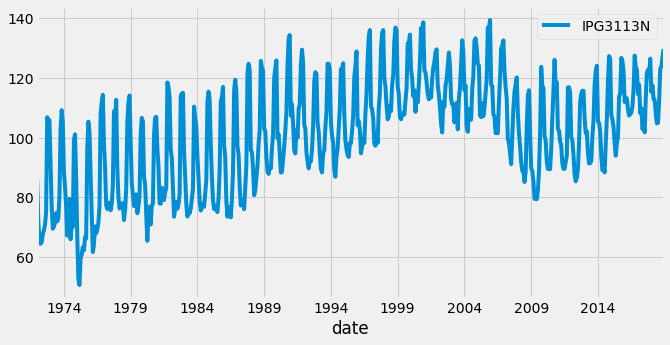

In [10]:
# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

This plotting method will be invaluable later when plotting multiple things on the same axis! Can you tell whether this is a stationary time series or not? How does it change throughout the year and across many years?

This is not a stationary time series, I also notice increasing trend over time and seasonality.

## Train-test splits

In this exercise you are going to take the candy production dataset and split it into a train and a test set. Like you understood in the video exercise, the reason to do this is so that you can test the quality of your model fit when you are done.

The candy production data set has been loaded in for you as candy already and pyplot has been loaded in as plt.

**Instructions**

* Split the time series into train and test sets by slicing with datetime indexes. Take the train set as everything up to the end of 2006 and the test set as everything from the start of 2007.
* Make a pyplot axes using the subplots() function.
* Use the DataFrame's .plot() method to plot the train and test sets on the axis ax.

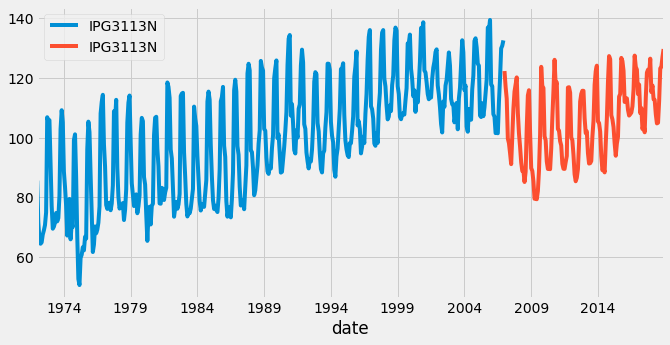

In [11]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

Take a look at the plot, do you think that you yourself could predict what happens after 2006 given the blue training set. What happens to the long term trend and the seasonal pattern?

## Is it stationary

![Is it Stationary](is_it_stationary.svg)

Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you cannot use ARMA models, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

In this exercise you will examine some stock and earthquake data sets in order to identify which are ready for ARMA modeling, and which will need further work to make them stationary.

1. Question 1
The top plot shown is a time series of Amazon stock close price.
Is the stock close price stationary?

 * No Because the top plot has a trend.
2. Question 2

The middle plot shown is a time series of the return (percentage increase of price per day) of Amazon stock.
Is the stock return stationary?

 * No, because in the middle plot, the variance changes with time.

3. Question 3

The bottom plot is a time series of the number of major earthquakes per year (earthquakes of magnitude 7.0 or greater).

Is the number of major earthquakes per year stationary?
 * Yes, the bottom plot appears to be stationary because you can't see any trend, or any obvious changes in variance, or dynamics. This time series looks stationary.

## Making time series stationary

**Overview**

* Statistical tests for stationarity
* Making a dataset stationary

**The augmented Dicky-Fuller test**

* Tests for trend non-stationary only.
This is a statistical test, where the null hypothesis is that your time series is non-stationary due to trend.

**Interpreting the test result**

The results object is a tuple. The zeroth element is the test statistic, in this case it is -1.34. The more negative this number is, the more likely that the data is stationary. The next item in the results tuple, is the test p-value. Here it's 0.6. If the p-value is smaller than 0.05, we reject the null hypothesis and assume our time series must be stationary. The last item in the tuple is a dictionary. This stores the critical values of the test statistic which equate to different p-values. In this case, if we wanted a p-value of 0.05 or below, our test statistic needed to be below -2.91.

**Taking the difference**

One very common way to make a time series stationary is to take its difference. This is where, from each value in our time series we subtract the previous value.

Difference: $\Delta y_t=y_t -y_{t-1}$

Using .diff() can help you.

##  Augmented Dicky-Fuller

In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

The earthquakes DataFrame has been loaded in for you as earthquake.

In [12]:
earthquake = pd.read_csv('earthquakes.csv', index_col='date', parse_dates=True)
earthquake.head()

,Year,earthquakes_per_year
date,,
1900-01-01,1900,13.0
1901-01-01,1901,14.0
1902-01-01,1902,8.0
1903-01-01,1903,10.0
1904-01-01,1904,16.0


In [13]:
earthquake.drop(['Year'], axis=1, inplace=True)

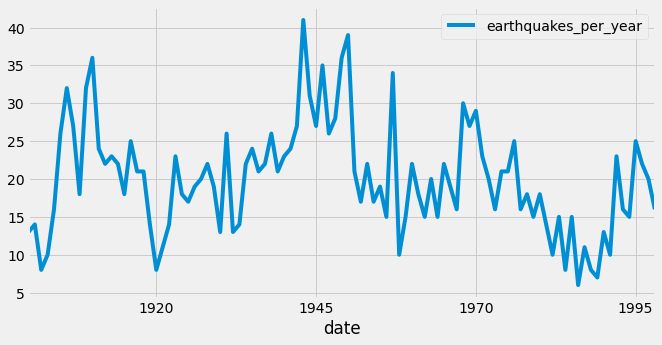

In [15]:
fig, ax1 = plt.subplots()
earthquake.plot(ax=ax1)
plt.show()

**Instructions**

* Import the augmented Dicky-Fuller function adfuller() from statsmodels.
* Run the adfuller() function on the 'earthquakes_per_year' column of the earthquake DataFrame and assign the result to result.
* Print the test statistic, the p-value and the critical values.

In [14]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.1831922511917816
0.020978425256003668
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


You can reject the null hypothesis that the time series is non-stationary. Therefore it is stationary. You probably could have intuited this from looking at the graph or by knowing a little about geology. The time series covers only about 100 years which is a very short time on a geological time scale.

## Taking the difference

In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the Augmented Dicky-Fuller test, and take the difference to make the dataset stationary.

The DataFrame of the time series has been loaded in for you as city and the adfuller() function has been imported.

In [17]:
city = pd.read_csv('city.csv', parse_dates=True, index_col='date')
city.head()

,city_population
date,
1969-09-30,1.000000
1970-03-31,0.960285
1970-09-30,0.957167
1971-03-31,0.946928
1971-09-30,0.987741


**Instructions**

* Run the augmented Dicky-Fuller on the 'city_population' column of city.
* Print the test statistic and the p-value.

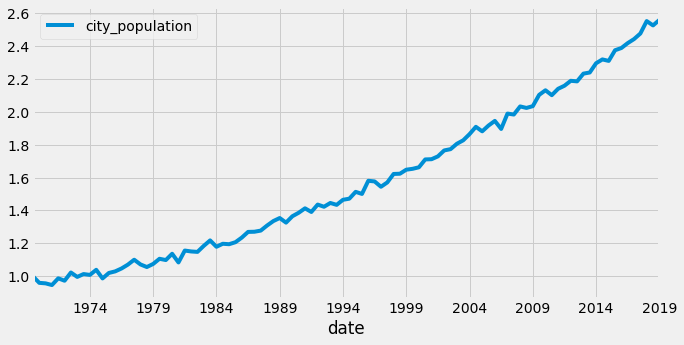

ADF Statistic: 5.297698878151183
p-value: 1.0


In [18]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

**2. Instructions**

* Take the first difference of city dropping the NaN values. Assign this to city_stationary and run the test again.

In [19]:
# Calculate the first difference of the time series
city_stationary = city.diff().dropna()
city_stationary.head()

,city_population
date,
1970-03-31,-0.039715
1970-09-30,-0.003118
1971-03-31,-0.010239
1971-09-30,0.040813
1972-03-31,-0.014539


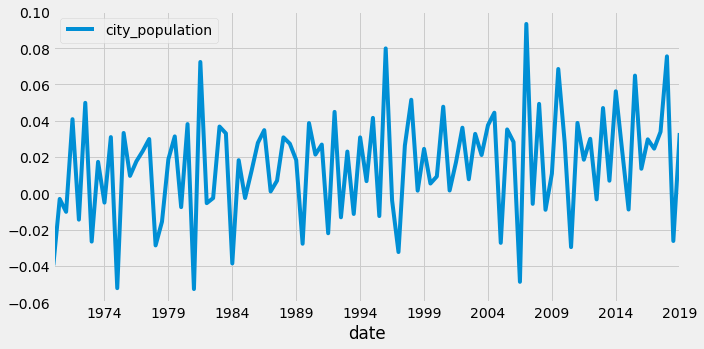

ADF Statistic: -0.8146211646182153
p-value: 0.8147894381484768


In [20]:

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

**3 Instruction**

* Take the second difference of city, by applying the .diff() method twice and drop the NaN values.

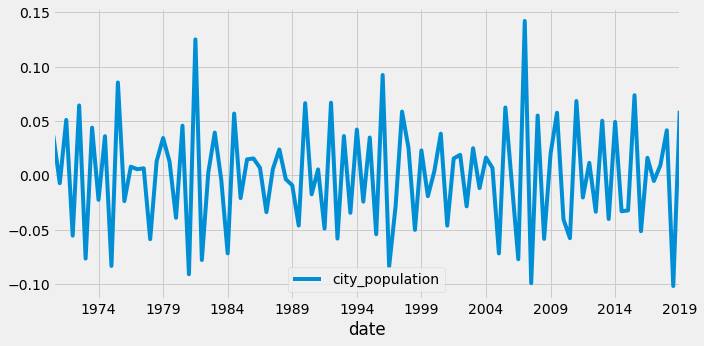

ADF Statistic: -6.433646032918764
p-value: 1.673449851039826e-08


In [21]:
# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

Amazing! A p-value of 0.000000016 is very significant! This time series is now stationary and ready for modeling!

## Other tranforms

Differencing should be the first transform you try to make a time series stationary. But sometimes it isn't the best option.

A classic way of transforming stock time series is the log-return of the series. This is calculated as follows:

$$log\_return ( y_t ) = log \left( \frac{y_t}{y_{t-1}} \right)$$ 

The Amazon stock time series has already been loaded for you as amazon. You can calculate the log-return of this DataFrame by substituting:

* $y_t \rightarrow amazon$
* $y_{t-1} \rightarrow amazon.shift(1)$
* $log() \rightarrow np.log()$

In this exercise you will compare the log-return transform and the first order difference of the Amazon stock time series to find which is better for making the time series stationary.

In [22]:
amazon = pd.read_csv('amazon_close.csv', index_col='date', parse_dates=True)
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


**Instructions**

* Calculate the first difference of the time series amazon to test for stationarity and drop the NaNs.

In [23]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.2035794888112425, 2.331271725487213e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


* Calculate the log return on the stocks time series amazon to test for stationarity.

In [26]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print("differenced")
print(result_diff)

# Calculate log-return and drop nans
amazon_log = np.log(amazon.div(amazon.shift(1)))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print("\n log-return")
print(result_log)

differenced
(-7.2035794888112425, 2.331271725487213e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)

 log-return
(-34.915748536059674, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


Notice that both the differenced and the log-return transformed time series have a small p-value, but the log transformed time series has a much more negative test statistic. This means the log-return tranformation is better.

## Intro to AR, MA and ARMA models

![ARMA](ARMA_models.png)

AR= Autoregressive model
AR(1) model: is the autoregressive coefficient at lag one.
$$y_t = a_1y_{t-1}+\epsilon_t$$

Compare this to a simple linear regression where the dependent variable is $y_t$ and the independent variable is $y_{t-1}$. The coefficient a_1 is just the slope of the line and the shocks are the residuals to the line. This is a first order AR model. The order of the model is the number of time lags used

## Model order

When fitting and working with AR, MA and ARMA models it is very important to understand the model order. You will need to pick the model order when fitting. Picking this correctly will give you a better fitting model which makes better predictions. So in this section you will practice working with model order.

In [27]:
ar_coefs = [1, 0.4, -0.1]
ma_coefs = [1, 0.2]

**Question**

Print ar_coefs and ma_coefs which are available in the console. 
* If you were to use these in the arma_generate_sample() function what would be the order of the data?
  * ARMA(2,1)
* If you were to use these in the arma_generate_sample() function what would the lag-1 AR coefficient?
  * -0.4

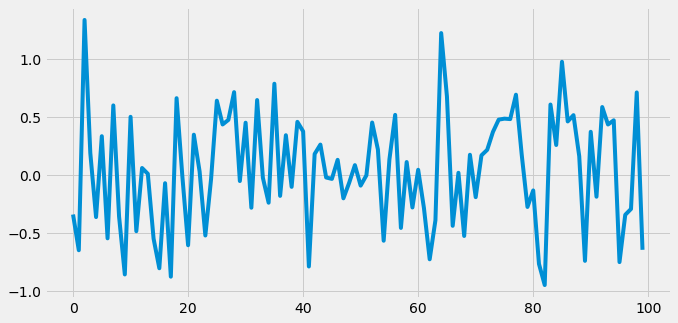

In [28]:
from statsmodels.tsa.arima_process import arma_generate_sample

#scales is the standard deviation of the epsilon.
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)

AR(1) model is equivalent to ARMA(1,0)

Note that setting either p or q to zero means we get a simpler model, either a AR or MA model.

## Generating ARMA data
In this exercise you will generate 100 days worth of AR/MA/ARMA data. Remember that in the real world applications, this data could be changes in Google stock prices, the energy requirements of New York City, or the number of cases of flu.

You can use the arma_generate_sample() function available in your workspace to generate time series using different AR and MA coefficients.

Remember for any model ARMA(p,q):

* The list ar_coefs has the form $[1, -a_1, -a_2, ..., -a_p]$.
* The list ma_coefs has the form $[1, m_1, m_2, ..., m_q]$,
where $a_i$ are the lag-i AR coefficients and $m_j$ are the lag-j MA coefficients.

In [29]:
np.random.seed(1)

* Set ar_coefs and ma_coefs for an MA(1) model with MA lag-1 coefficient of -0.7.
* Generate a time series of 100 values.

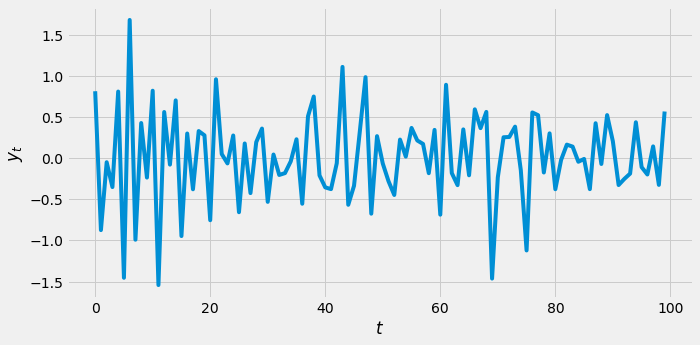

In [30]:
# Set coefficients
ar_coefs = [1]
ma_coefs = [1,-0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

* Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively.

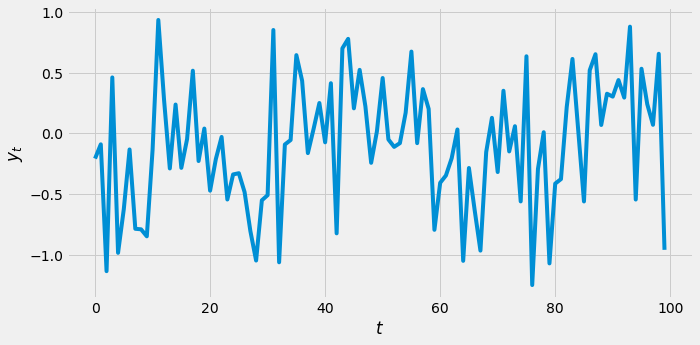

In [37]:
np.random.seed(2)

# Set coefficients
ar_coefs = [1,-0.3,-0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

* Set the coefficients for a model with form $y_t = -0.2 y_{t-1} + 0.3 \epsilon_{t-1} + 0.4 \epsilon_{t-2} + \epsilon_t$

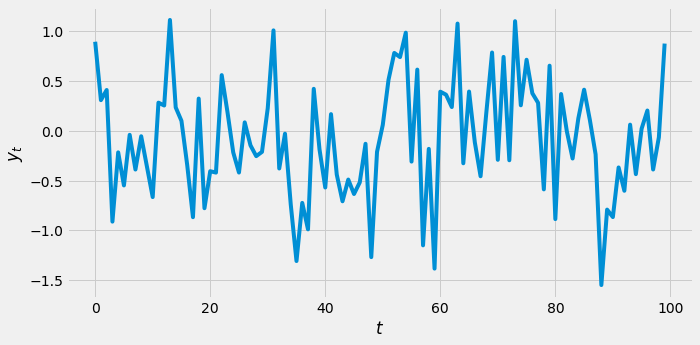

In [38]:
np.random.seed(3)

# Set coefficients
ar_coefs = [1,0.2]
ma_coefs = [1,0.3,0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

 You can use this data to check our code. If you can recover these same coefficients when you fit a model, then you will know your methods work!

## Fitting Prelude

Great, you understand model order! Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In this exercise you will do some basic fitting. Fitting models is the next key step towards making predictions. We'll go into this more in the next chapter but let's get a head start.

Some example ARMA(1,1) data have been created and are available in your environment as y. This data could represent the amount of traffic congestion. You could use forecasts of this to suggest the efficient routes for drivers.

In [34]:
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1, 1))

# Fit the model
results = model.fit()

You just fit your first ARMA model. In the next chapter, we'll dig deeper into fitting ARIMA models.